# plot_by_n

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       2170 non-null   int64 
 1   m       2170 non-null   int64 
 2   time    2170 non-null   int64 
 3   name    2170 non-null   object
dtypes: int64(3), object(1)
memory usage: 67.9+ KB
None
     n     m  time   name
0  100  1000   265  Naive
1  100  1000   280  Naive
2  100  1000   264  Naive
3  100  1000   280  Naive
4  100  1000   280  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       2170 non-null   int64  
 1   m       2170 non-null   int64  
 2   time    2170 non-null   float64
 3   name    2170 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-21-9026d6c462b0>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-21-9026d6c462b0>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-21-9026d6c462b0>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 797.37it/s]


100 102592
144.4 14296.5

그래프 그리는중


7it [00:00, 450.70it/s]


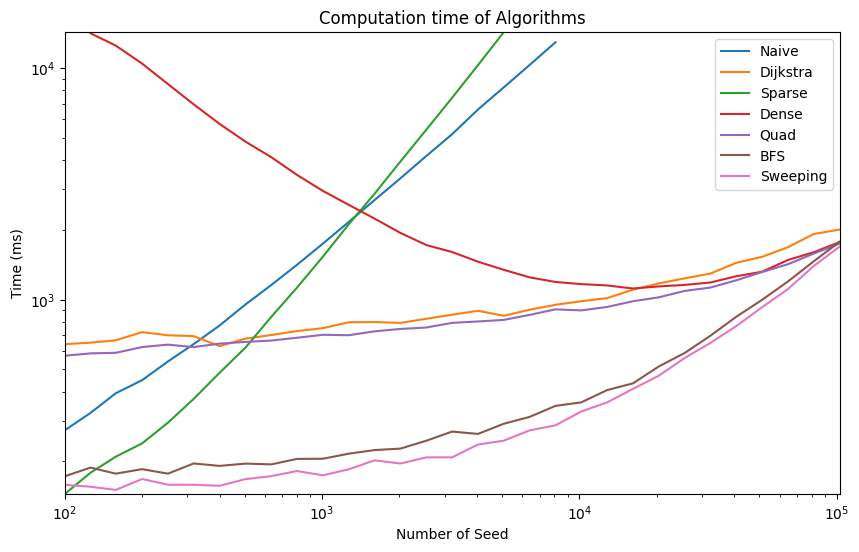

In [21]:
# 경로 변수 저장
csv_path = "plot_by_n_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 200000
type_of_graph = 'n'
fixed_value = 1000
time_upper = 15000

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       2170 non-null   int64 
 1   m       2170 non-null   int64 
 2   time    2170 non-null   int64 
 3   name    2170 non-null   object
dtypes: int64(3), object(1)
memory usage: 67.9+ KB
None
     n     m  time   name
0  100  1000   265  Naive
1  100  1000   280  Naive
2  100  1000   264  Naive
3  100  1000   280  Naive
4  100  1000   280  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       2170 non-null   int64  
 1   m       2170 non-null   int64  
 2   time    2170 non-null   float64
 3   name    2170 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-22-0cabcda9d974>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-22-0cabcda9d974>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-22-0cabcda9d974>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 1044.73it/s]


100 102592
144.4 14296.5

그래프 그리는중


7it [00:00, 1053.24it/s]


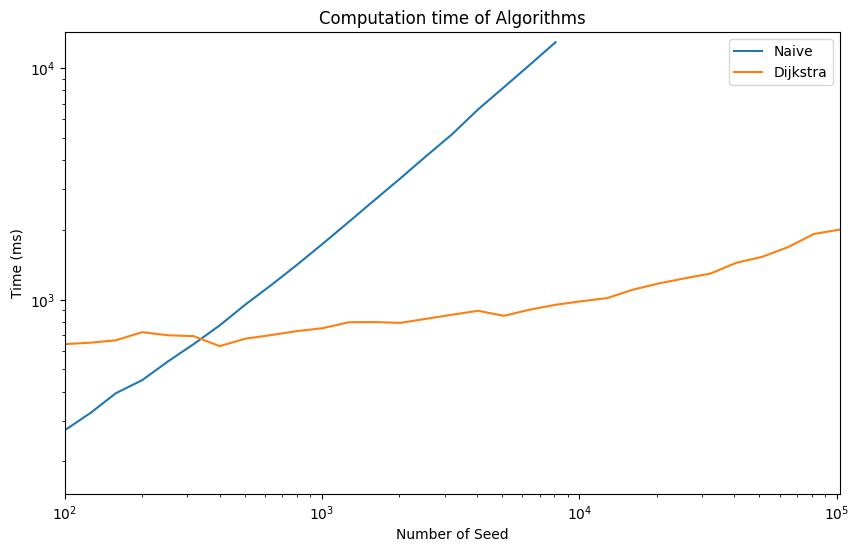

In [22]:
# 경로 변수 저장
csv_path = "plot_by_n_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 200000
type_of_graph = 'n'
fixed_value = 1000
time_upper = 15000
target = "Dijkstra"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       2170 non-null   int64 
 1   m       2170 non-null   int64 
 2   time    2170 non-null   int64 
 3   name    2170 non-null   object
dtypes: int64(3), object(1)
memory usage: 67.9+ KB
None
     n     m  time   name
0  100  1000   265  Naive
1  100  1000   280  Naive
2  100  1000   264  Naive
3  100  1000   280  Naive
4  100  1000   280  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       2170 non-null   int64  
 1   m       2170 non-null   int64  
 2   time    2170 non-null   float64
 3   name    2170 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-23-c49be7411434>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-23-c49be7411434>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-23-c49be7411434>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 1007.07it/s]


100 102592
144.4 14296.5

그래프 그리는중


7it [00:00, 636.00it/s]


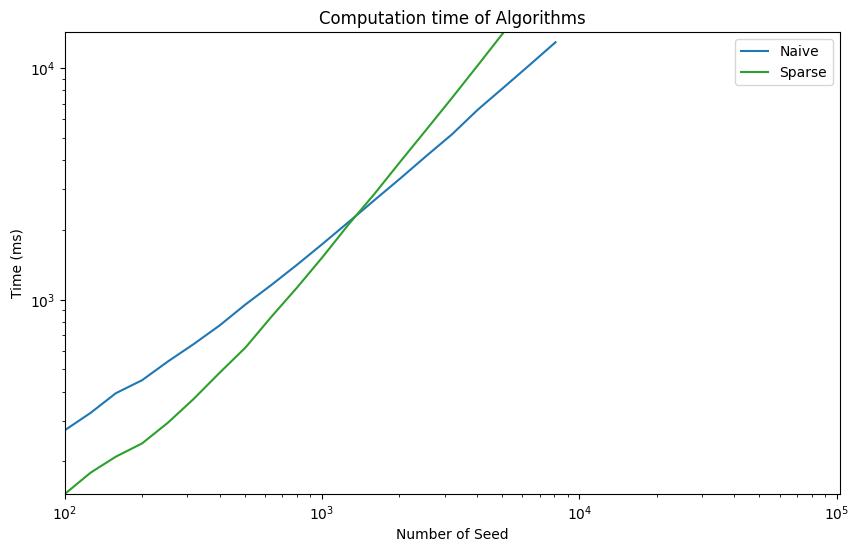

In [23]:
# 경로 변수 저장
csv_path = "plot_by_n_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 200000
type_of_graph = 'n'
fixed_value = 1000
time_upper = 15000
target = "Sparse"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       2170 non-null   int64 
 1   m       2170 non-null   int64 
 2   time    2170 non-null   int64 
 3   name    2170 non-null   object
dtypes: int64(3), object(1)
memory usage: 67.9+ KB
None
     n     m  time   name
0  100  1000   265  Naive
1  100  1000   280  Naive
2  100  1000   264  Naive
3  100  1000   280  Naive
4  100  1000   280  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       2170 non-null   int64  
 1   m       2170 non-null   int64  
 2   time    2170 non-null   float64
 3   name    2170 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-24-50b0b83777f2>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-24-50b0b83777f2>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-24-50b0b83777f2>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 1019.66it/s]


100 102592
144.4 14296.5

그래프 그리는중


7it [00:00, 877.52it/s]


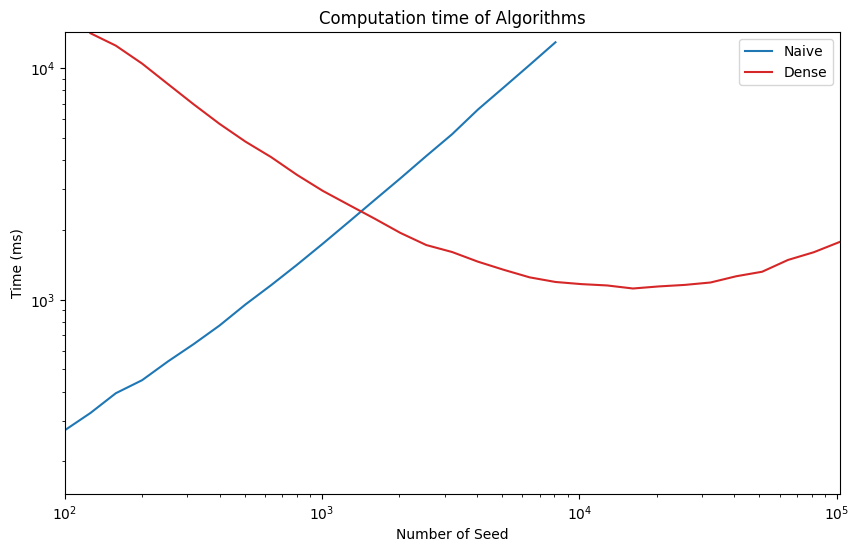

In [24]:
# 경로 변수 저장
csv_path = "plot_by_n_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 200000
type_of_graph = 'n'
fixed_value = 1000
time_upper = 15000
target = "Dense"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       2170 non-null   int64 
 1   m       2170 non-null   int64 
 2   time    2170 non-null   int64 
 3   name    2170 non-null   object
dtypes: int64(3), object(1)
memory usage: 67.9+ KB
None
     n     m  time   name
0  100  1000   265  Naive
1  100  1000   280  Naive
2  100  1000   264  Naive
3  100  1000   280  Naive
4  100  1000   280  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       2170 non-null   int64  
 1   m       2170 non-null   int64  
 2   time    2170 non-null   float64
 3   name    2170 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-25-5384ffd4bf19>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-25-5384ffd4bf19>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-25-5384ffd4bf19>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 2490.89it/s]


100 102592
144.4 14296.5

그래프 그리는중


7it [00:00, 1085.24it/s]


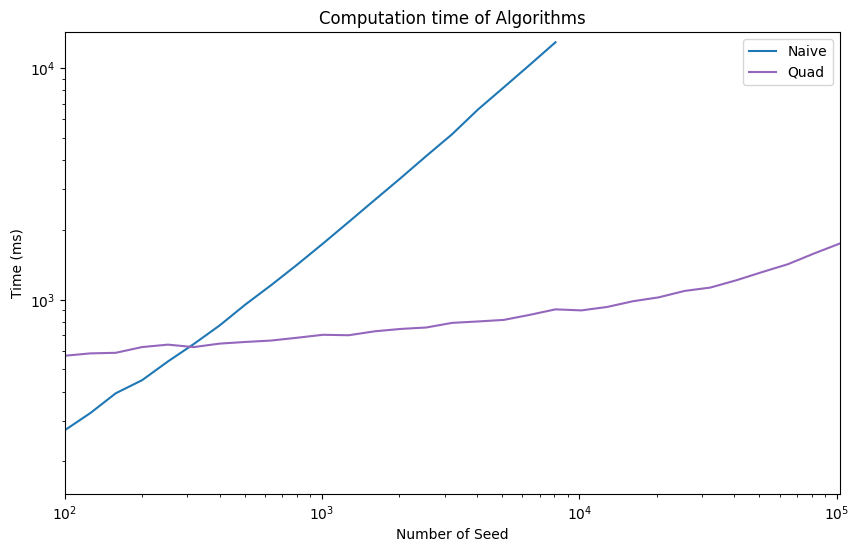

In [25]:
# 경로 변수 저장
csv_path = "plot_by_n_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 200000
type_of_graph = 'n'
fixed_value = 1000
time_upper = 15000
target = "Quad"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       2170 non-null   int64 
 1   m       2170 non-null   int64 
 2   time    2170 non-null   int64 
 3   name    2170 non-null   object
dtypes: int64(3), object(1)
memory usage: 67.9+ KB
None
     n     m  time   name
0  100  1000   265  Naive
1  100  1000   280  Naive
2  100  1000   264  Naive
3  100  1000   280  Naive
4  100  1000   280  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       2170 non-null   int64  
 1   m       2170 non-null   int64  
 2   time    2170 non-null   float64
 3   name    2170 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-26-85914f803cdb>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-26-85914f803cdb>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-26-85914f803cdb>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 864.37it/s]


100 102592
144.4 14296.5

그래프 그리는중


7it [00:00, 739.46it/s]


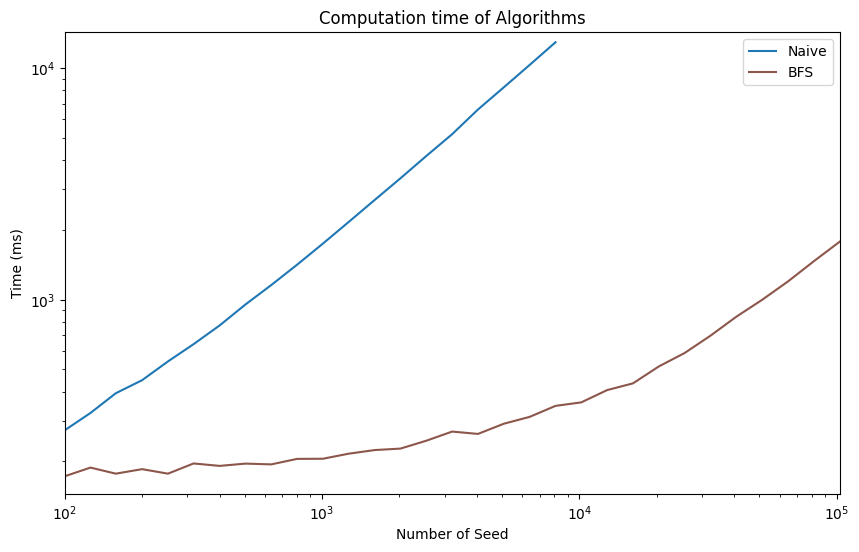

In [26]:
# 경로 변수 저장
csv_path = "plot_by_n_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 200000
type_of_graph = 'n'
fixed_value = 1000
time_upper = 15000
target = "BFS"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       2170 non-null   int64 
 1   m       2170 non-null   int64 
 2   time    2170 non-null   int64 
 3   name    2170 non-null   object
dtypes: int64(3), object(1)
memory usage: 67.9+ KB
None
     n     m  time   name
0  100  1000   265  Naive
1  100  1000   280  Naive
2  100  1000   264  Naive
3  100  1000   280  Naive
4  100  1000   280  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       2170 non-null   int64  
 1   m       2170 non-null   int64  
 2   time    2170 non-null   float64
 3   name    2170 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-27-2801c43f51dd>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-27-2801c43f51dd>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-27-2801c43f51dd>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 1380.87it/s]


100 102592
144.4 14296.5

그래프 그리는중


7it [00:00, 781.92it/s]


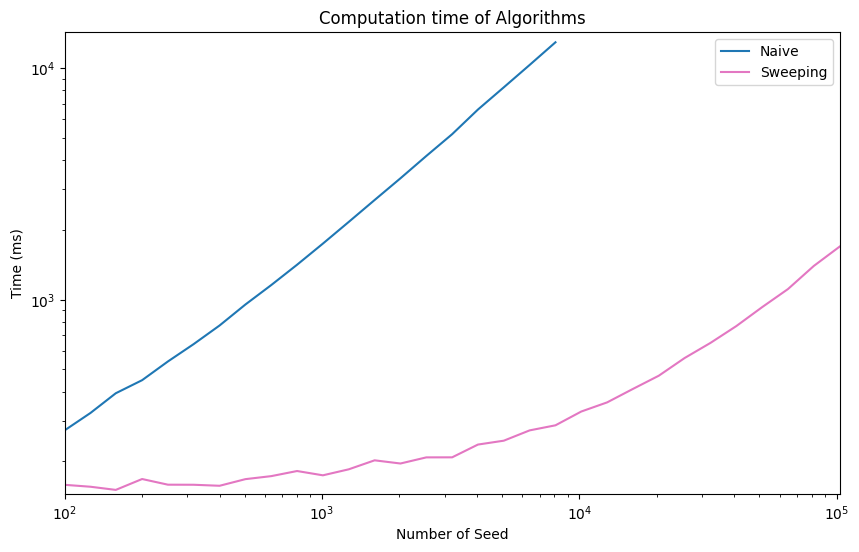

In [27]:
# 경로 변수 저장
csv_path = "plot_by_n_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 200000
type_of_graph = 'n'
fixed_value = 1000
time_upper = 15000
target = "Sweeping"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

# plot_by_m

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       1890 non-null   int64 
 1   m       1890 non-null   int64 
 2   time    1890 non-null   int64 
 3   name    1890 non-null   object
dtypes: int64(3), object(1)
memory usage: 59.2+ KB
None
       n   m  time   name
0  10000  10    62  Naive
1  10000  10    93  Naive
2  10000  10    78  Naive
3  10000  10    78  Naive
4  10000  10    62  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       1890 non-null   int64  
 1   m       1890 non-null   int64  
 2   time    1890 non-null   float64
 3   name    1890 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-28-f8377d1827fa>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-28-f8377d1827fa>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-28-f8377d1827fa>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 1686.20it/s]


10 4070
72.7 14960.0

그래프 그리는중


7it [00:00, 472.43it/s]


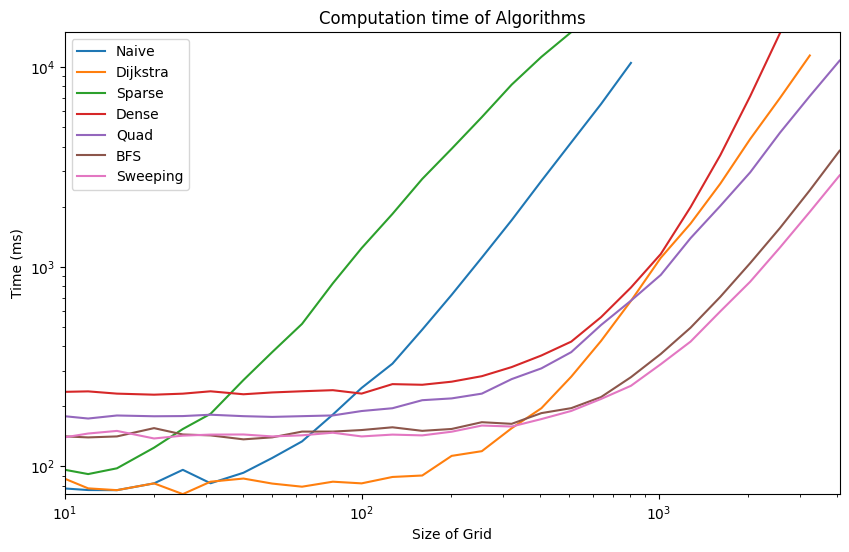

In [28]:
# 경로 변수 저장
csv_path = "plot_by_m_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 5000
type_of_graph = 'm'
fixed_value = 10000
time_upper = 15000

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       1890 non-null   int64 
 1   m       1890 non-null   int64 
 2   time    1890 non-null   int64 
 3   name    1890 non-null   object
dtypes: int64(3), object(1)
memory usage: 59.2+ KB
None
       n   m  time   name
0  10000  10    62  Naive
1  10000  10    93  Naive
2  10000  10    78  Naive
3  10000  10    78  Naive
4  10000  10    62  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       1890 non-null   int64  
 1   m       1890 non-null   int64  
 2   time    1890 non-null   float64
 3   name    1890 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-30-7cd77db0af15>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-30-7cd77db0af15>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-30-7cd77db0af15>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 290.00it/s]


10 4070
72.7 14960.0

그래프 그리는중


7it [00:00, 832.84it/s]


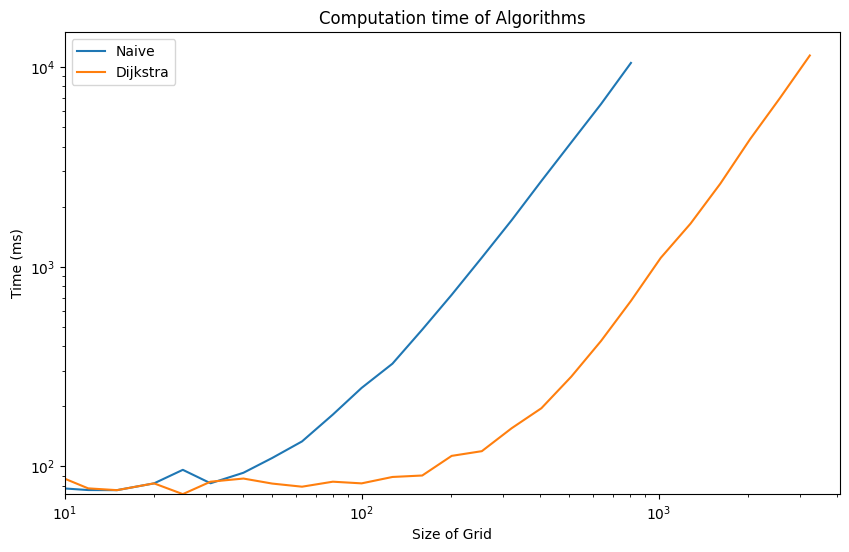

In [30]:
# 경로 변수 저장
csv_path = "plot_by_m_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 5000
type_of_graph = 'm'
fixed_value = 10000
time_upper = 15000
target = "Dijkstra"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       1890 non-null   int64 
 1   m       1890 non-null   int64 
 2   time    1890 non-null   int64 
 3   name    1890 non-null   object
dtypes: int64(3), object(1)
memory usage: 59.2+ KB
None
       n   m  time   name
0  10000  10    62  Naive
1  10000  10    93  Naive
2  10000  10    78  Naive
3  10000  10    78  Naive
4  10000  10    62  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       1890 non-null   int64  
 1   m       1890 non-null   int64  
 2   time    1890 non-null   float64
 3   name    1890 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-31-89305fb7fadb>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-31-89305fb7fadb>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-31-89305fb7fadb>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 1673.13it/s]


10 4070
72.7 14960.0

그래프 그리는중


7it [00:00, 948.29it/s]


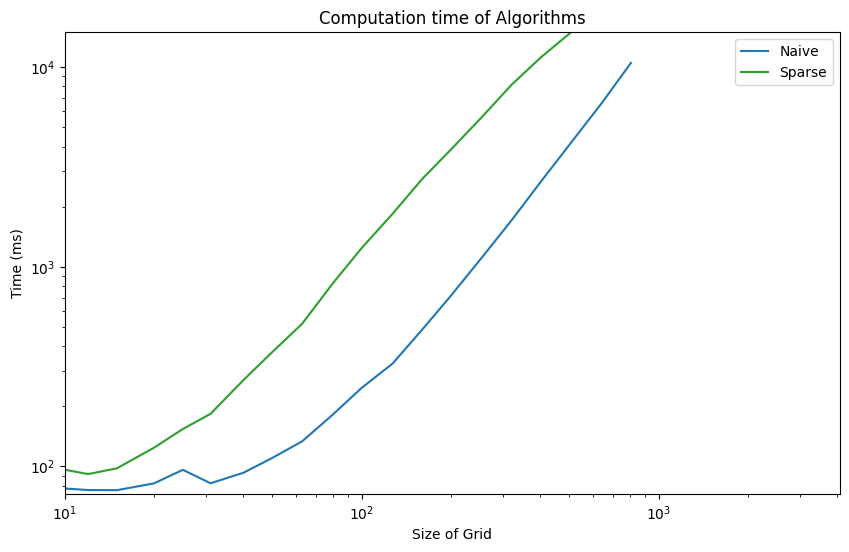

In [31]:
# 경로 변수 저장
csv_path = "plot_by_m_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 5000
type_of_graph = 'm'
fixed_value = 10000
time_upper = 15000
target = "Sparse"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       1890 non-null   int64 
 1   m       1890 non-null   int64 
 2   time    1890 non-null   int64 
 3   name    1890 non-null   object
dtypes: int64(3), object(1)
memory usage: 59.2+ KB
None
       n   m  time   name
0  10000  10    62  Naive
1  10000  10    93  Naive
2  10000  10    78  Naive
3  10000  10    78  Naive
4  10000  10    62  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       1890 non-null   int64  
 1   m       1890 non-null   int64  
 2   time    1890 non-null   float64
 3   name    1890 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-32-e6fad349ae9a>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-32-e6fad349ae9a>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-32-e6fad349ae9a>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 976.69it/s]


10 4070
72.7 14960.0

그래프 그리는중


7it [00:00, 394.45it/s]


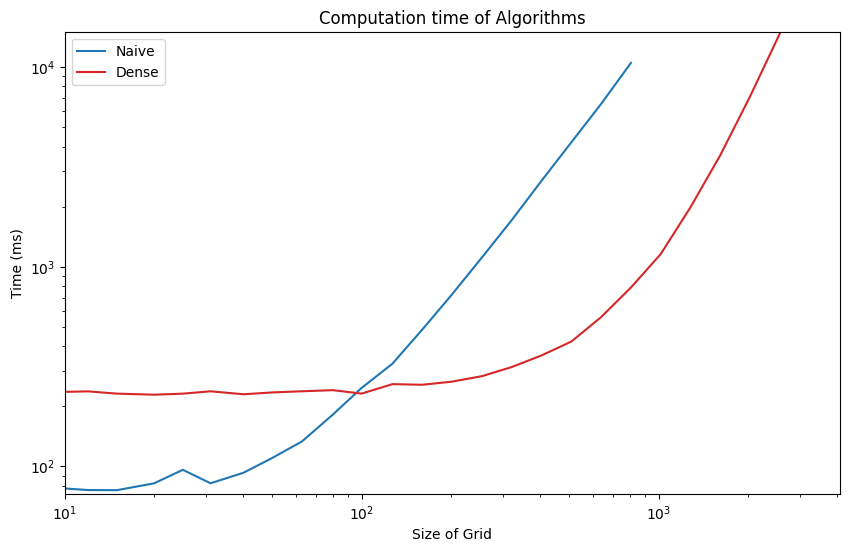

In [32]:
# 경로 변수 저장
csv_path = "plot_by_m_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 5000
type_of_graph = 'm'
fixed_value = 10000
time_upper = 15000
target = "Dense"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       1890 non-null   int64 
 1   m       1890 non-null   int64 
 2   time    1890 non-null   int64 
 3   name    1890 non-null   object
dtypes: int64(3), object(1)
memory usage: 59.2+ KB
None
       n   m  time   name
0  10000  10    62  Naive
1  10000  10    93  Naive
2  10000  10    78  Naive
3  10000  10    78  Naive
4  10000  10    62  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       1890 non-null   int64  
 1   m       1890 non-null   int64  
 2   time    1890 non-null   float64
 3   name    1890 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-33-84f593fa7679>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-33-84f593fa7679>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-33-84f593fa7679>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 855.93it/s]


10 4070
72.7 14960.0

그래프 그리는중


7it [00:00, 825.02it/s]


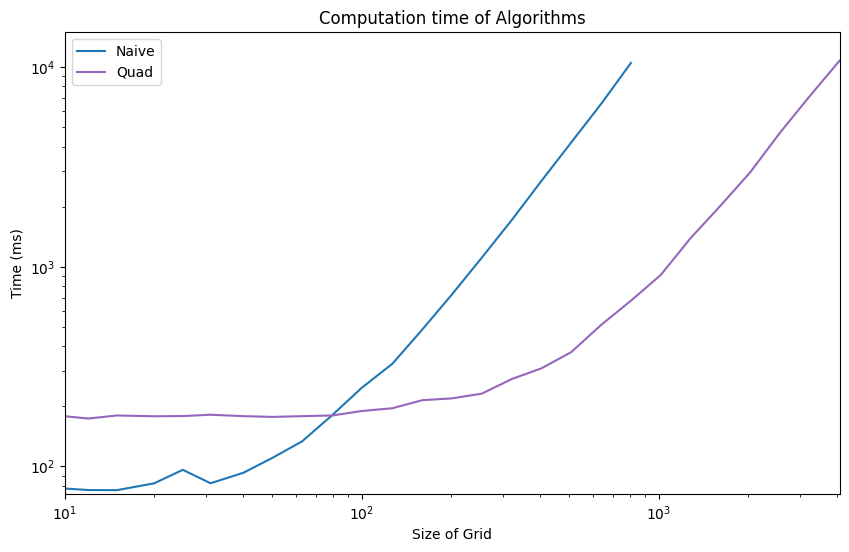

In [33]:
# 경로 변수 저장
csv_path = "plot_by_m_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 5000
type_of_graph = 'm'
fixed_value = 10000
time_upper = 15000
target = "Quad"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       1890 non-null   int64 
 1   m       1890 non-null   int64 
 2   time    1890 non-null   int64 
 3   name    1890 non-null   object
dtypes: int64(3), object(1)
memory usage: 59.2+ KB
None
       n   m  time   name
0  10000  10    62  Naive
1  10000  10    93  Naive
2  10000  10    78  Naive
3  10000  10    78  Naive
4  10000  10    62  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       1890 non-null   int64  
 1   m       1890 non-null   int64  
 2   time    1890 non-null   float64
 3   name    1890 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-34-b0e3dd11a2f3>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-34-b0e3dd11a2f3>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-34-b0e3dd11a2f3>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 545.39it/s]


10 4070
72.7 14960.0

그래프 그리는중


7it [00:00, 598.92it/s]


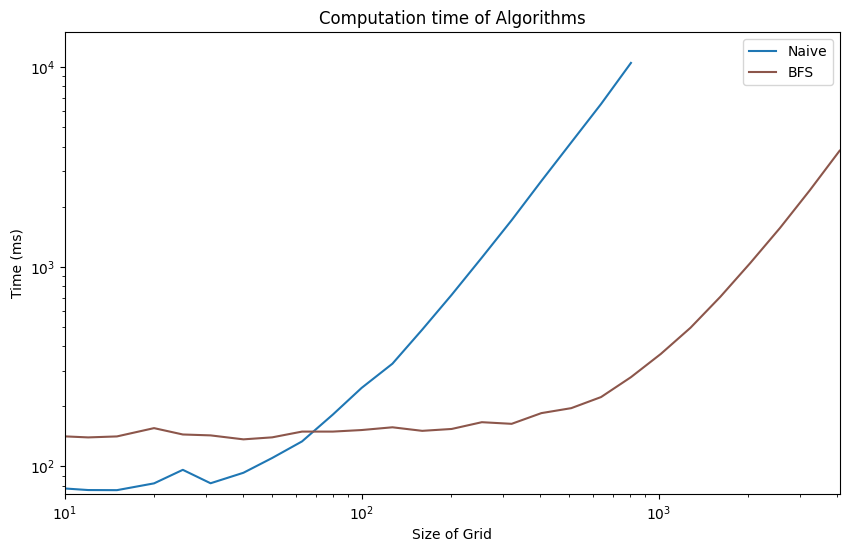

In [34]:
# 경로 변수 저장
csv_path = "plot_by_m_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 5000
type_of_graph = 'm'
fixed_value = 10000
time_upper = 15000
target = "BFS"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()

엑셀 파일 읽는중

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   n       1890 non-null   int64 
 1   m       1890 non-null   int64 
 2   time    1890 non-null   int64 
 3   name    1890 non-null   object
dtypes: int64(3), object(1)
memory usage: 59.2+ KB
None
       n   m  time   name
0  10000  10    62  Naive
1  10000  10    93  Naive
2  10000  10    78  Naive
3  10000  10    78  Naive
4  10000  10    62  Naive
Index(['Naive', 'Dijkstra', 'Sparse', 'Dense', 'Quad', 'BFS', 'Sweeping'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       1890 non-null   int64  
 1   m       1890 non-null   int64  
 2   time    1890 non-null   float64
 3   name    1890 non-null   object 
dtypes: float64(1), int64(2), object

  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-35-2691f8b89bf9>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-35-2691f8b89bf9>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
<ipython-input-35-2691f8b89bf9>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu


최대 최소 찾기


100%|██████████| 7/7 [00:00<00:00, 1353.00it/s]


10 4070
72.7 14960.0

그래프 그리는중


7it [00:00, 1025.36it/s]


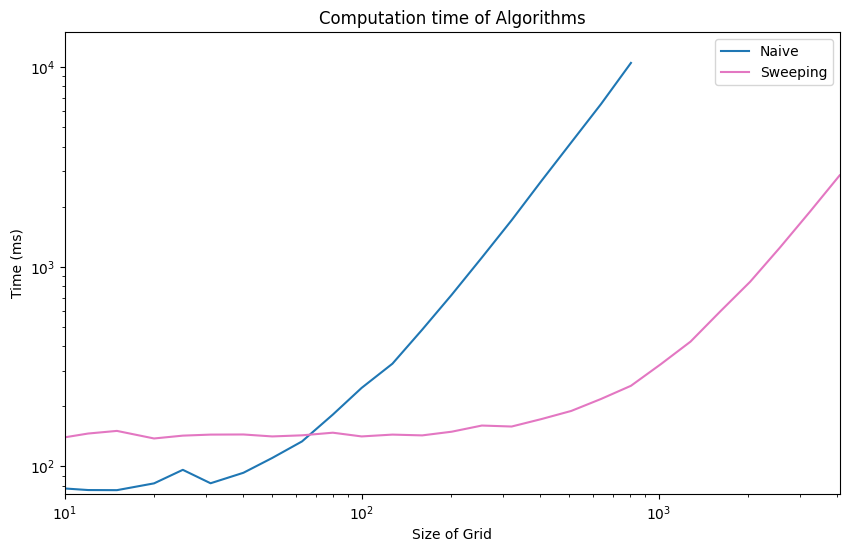

In [35]:
# 경로 변수 저장
csv_path = "plot_by_m_fig.csv"

# 상수 정의하기
min_value = 1
max_value = 5000
type_of_graph = 'm'
fixed_value = 10000
time_upper = 15000
target = "Sweeping"

#부가적인 전처리
type_of_fixed_value= 'm' if type_of_graph == 'n' else 'n'

import numpy as np
import pandas as pd
from tqdm import tqdm

# 엑셀 파일 읽기
print('엑셀 파일 읽는중\n')
df = pd.read_csv(csv_path, usecols=[0,1, 2, 3])
print(df.info())
print(df.head(5))
print(df['name'].value_counts().index)
df['time'].replace('TLE',np.nan,inplace=True)
df['time']=df['time'].astype(float)
print(df.info())

'''	n min n max 안에 있는 모든 데이터 불러와서
	n 기준 오름차순 Series 만들기'''
algorithm_list=list(df['name'].value_counts().index)
name_list=[]
df_list=[]
print('\n기본 데이터프레임 처리')
for name in tqdm(algorithm_list):
	df_tmp=df[(df['name']==name)&(df[type_of_fixed_value]==fixed_value)&(df[type_of_graph]>=min_value)&(df[type_of_graph]<=max_value)&(df['time']<time_upper)]
	df_tmp = pd.DataFrame(df_tmp.groupby(type_of_graph).mean()).reset_index()
    # print(df_tmp.info())
	df_list.append(df_tmp)
	name_list.append(name)


# 각 시리즈에서 최대값과 최소값을 파악하기 위한 초기값 설정
global_min_x = float('inf')
global_max_x = float('-inf')
global_min_y = float('inf')
global_max_y = float('-inf')

# df_list 내의 각 시리즈에 대해서
print('\n최대 최소 찾기')
for df_tm in tqdm(df_list):
    # 로그형 그래프
    # df_tm[type_of_graph]=np.log10(df_tm[type_of_graph])
    # df_tm['time']=np.log10(df_tm['time'])

    # 시리즈의 인덱스(x축 값)의 최소값과 최대값을 파악
    min_x = df_tm[type_of_graph].min()
    max_x = df_tm[type_of_graph].max()

    # 시리즈의 값(y축 값)의 최소값과 최대값을 파악
    min_y = df_tm['time'].min()
    max_y = df_tm['time'].max()

    # 현재 시리즈의 최소값과 최대값을 기반으로 전체 데이터의 최소값과 최대값 갱신
    global_min_x = min(global_min_x, min_x)
    global_max_x = max(global_max_x, max_x)
    global_min_y = min(global_min_y, min_y)
    global_max_y = max(global_max_y, max_y)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프를 그리기 위한 설정
plt.figure(figsize=(10, 6))

print(global_min_x,global_max_x)
print(global_min_y,global_max_y)
plt.xlim(global_min_x, global_max_x)
plt.ylim(global_min_y, global_max_y)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# df_list의 각 Series에 대하여 그래프를 그림
print('\n그래프 그리는중')
for dataframe, name, color in tqdm(zip(df_list, name_list, color_list)):
	# Sort the dataframe based on the 'type_of_graph' column
	dataframe = dataframe.sort_values(by=type_of_graph)
	dataframe.head(10)
	if name == "Naive" or name == target:
		plt.plot(dataframe[type_of_graph], dataframe['time'], label=name, color=color)


# 범례 표시
plt.legend()

# 그래프의 제목, x축 및 y축 라벨 설정
plt.title('Computation time of Algorithms')
plt.xlabel('Number of Seed' if type_of_graph == 'n' else 'Size of Grid')
plt.ylabel('Time (ms)')

plt.xscale('log')
plt.yscale('log')

fig = plt.gcf()

# 그래프 출력
plt.show()